In [2]:
!~/deconv/scripts/csx_fractions_melanoma_insilico.sh

setting up CIBERSORTx in directory:
/mnt/buckets/liulab/csx-runs/20210806_215938
/mnt/buckets/liulab/csx-runs/20210806_215938/in ~/deconv
~/deconv
/mnt/buckets/liulab/csx-runs/20210806_215938
├── [   0]  in
│   ├── [ 27M]  mymixture.txt
│   ├── [ 88M]  myrefsample.txt
│   ├── [   0]  symlink-mymixture.txt -> /mnt/buckets/liulab/derek/simulations/experiments/cibersortx_sim_0.5sd.txt
│   └── [   0]  symlink-myrefsample.txt -> /mnt/buckets/liulab/csx_example_files/Single_Cell_RNA-Seq_Melanoma_SuppFig_3b-d/scRNA-Seq_reference_melanoma_Tirosh_SuppFig_3b-d.txt
└── [   0]  out

2 directories, 4 files
>Running CIBERSORTxFractions...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] single_cell: TRUE
>[Options] refsample: myrefsample.txt
>[Options] mixture: mymixture.txt
>[Options] replicates: 5
>[Options] sampling: 0.5
>[Options] fraction: 0.75
>[Options] k.max: 999
>[Options] q.value: 0.01
>[Options] G.min: 300
>[Options] G.max: 500
>[Opt

In [1]:
import pandas as pd

# fractions predicted by csx

In [2]:
csx_fractions = pd.read_csv(
    "/mnt/buckets/liulab/csx-runs/20210806_215938/out/CIBERSORTx_Results.txt",
    sep="\t",
    index_col=0,
).loc[:, "Malignant":"B cells"]

In [3]:
csx_fractions

,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
Mixture,,,,,,,,
sim.tumor.1,0.726018,0.012055,0.040918,0.027831,0.022251,0.039219,0.100657,0.031050
sim.tumor.2,0.916660,0.000000,0.002482,0.001578,0.010377,0.013967,0.045217,0.009718
sim.tumor.3,0.310563,0.058927,0.122819,0.046092,0.036871,0.083720,0.275172,0.065834
sim.tumor.4,0.173783,0.052562,0.217824,0.046447,0.061643,0.086674,0.305837,0.055230
sim.tumor.5,0.308142,0.059209,0.248322,0.000000,0.052402,0.051605,0.256415,0.023904
...,...,...,...,...,...,...,...,...
sim.tumor.96,0.661506,0.048744,0.000000,0.060772,0.052687,0.021791,0.105711,0.048788
sim.tumor.97,0.471480,0.049926,0.065691,0.000000,0.055307,0.061464,0.219180,0.076953
sim.tumor.98,0.036474,0.000000,0.231196,0.151086,0.039834,0.105194,0.302634,0.133581


In [4]:
csx_fractions_derek = pd.read_csv(
    "/mnt/buckets/liulab/derek/simulations/experiments/cibersortx/cibersortx_sim_0.5sd/CIBERSORTxGEP_Job3_Fractions-Adjusted.txt",
    sep="\t",
    index_col=0,
).loc[:, "Malignant":"B cells"]
csx_fractions_derek

,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells
Mixture,,,,,,,,
sim.tumor.1,0.634537,0.009402,0.068497,0.013531,0.027027,0.055589,0.154121,0.037297
sim.tumor.2,0.843653,0.000547,0.012051,0.011933,0.013648,0.024833,0.066372,0.026962
sim.tumor.3,0.356872,0.037935,0.104678,0.042459,0.030138,0.095473,0.283333,0.049112
sim.tumor.4,0.243679,0.025083,0.190378,0.048065,0.048958,0.096852,0.304444,0.042541
sim.tumor.5,0.357577,0.044369,0.225275,0.000000,0.031734,0.087326,0.205566,0.048153
...,...,...,...,...,...,...,...,...
sim.tumor.96,0.570503,0.043110,0.005001,0.041151,0.047830,0.063391,0.154164,0.074852
sim.tumor.97,0.428931,0.037244,0.075210,0.023856,0.043723,0.077986,0.232984,0.080066
sim.tumor.98,0.096804,0.004556,0.179027,0.115687,0.037100,0.138810,0.310514,0.117502


# truth

In [5]:
truth = pd.read_csv(
    "/mnt/buckets/liulab/derek/simulations/experiments/generate_cohorts_for_emma/ctp_sim_0.5sd.txt",
    sep="\t",
)

In [6]:
truth

,Malignant.cell,Endothelial.cell,CAF,T.CD8,NK,Macrophage,T.CD4,B.cell
1,0.725,0.030567,0.053134,0.014234,0.019605,0.025273,0.085953,0.046233
2,0.207,0.088145,0.153220,0.041046,0.056533,0.072878,0.247859,0.133320
3,0.566,0.048241,0.083856,0.022464,0.030940,0.039885,0.135650,0.072964
4,0.841,0.017673,0.030721,0.008230,0.011335,0.014612,0.049697,0.026731
5,0.683,0.035236,0.061250,0.016408,0.022599,0.029133,0.099081,0.053294
...,...,...,...,...,...,...,...,...
96,0.596,0.044906,0.078059,0.020911,0.028801,0.037128,0.126273,0.067921
97,0.408,0.065803,0.114384,0.030642,0.042204,0.054406,0.185034,0.099528
98,0.246,0.083810,0.145685,0.039027,0.053753,0.069294,0.235669,0.126763
99,0.691,0.034346,0.059704,0.015994,0.022029,0.028398,0.096580,0.051949


# plots of predictions vs truth

In [7]:
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px

## Derek's predictions (website)

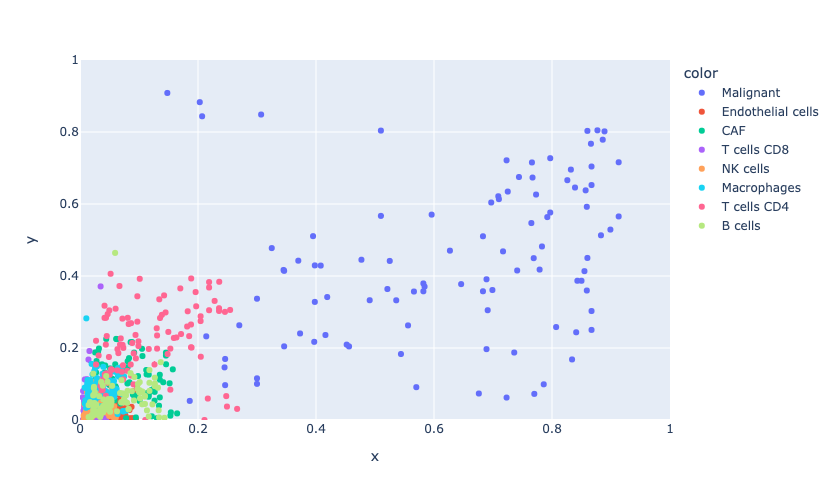

In [8]:
fig = px.scatter(
    x=truth.stack().values,
    y=csx_fractions_derek.stack().values,
    color=csx_fractions_derek.stack().reset_index()["level_1"],
)
fig.update_layout(
    width=600,
    height=500,
)
fig.update_xaxes(range=(0, 1))
fig.update_yaxes(
    range=(0, 1),
)

In [9]:
both = csx_fractions_derek.stack().to_frame(name="derek")
both["truth"] = truth.stack().values

In [10]:
both.corr()

,derek,truth
derek,1.000000,0.772707
truth,0.772707,1.000000


In [11]:
both.reset_index().groupby("level_1").corr().iloc[0::2, -1]

level_1                 
B cells            derek    0.215865
CAF                derek    0.061981
Endothelial cells  derek    0.302038
Macrophages        derek    0.141117
Malignant          derek    0.282372
NK cells           derek    0.275867
T cells CD4        derek    0.238173
T cells CD8        derek    0.125315
Name: truth, dtype: float64

## my predictions (docker)

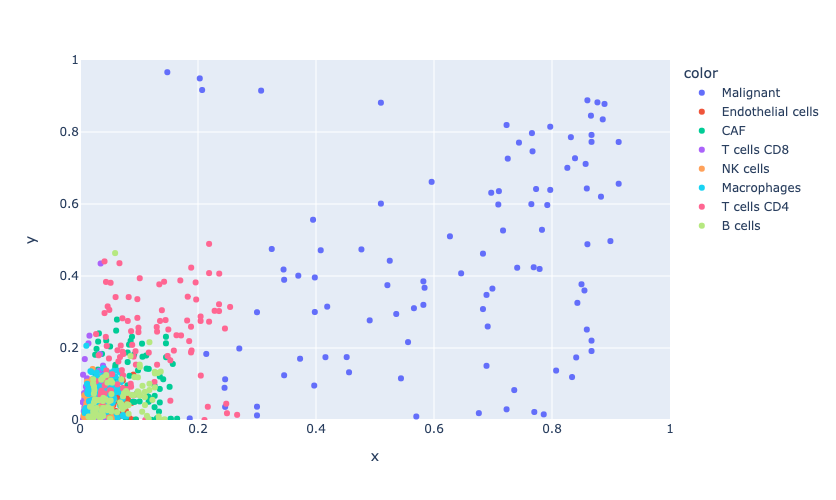

In [12]:
fig = px.scatter(
    x=truth.stack().values,
    y=csx_fractions.stack().values,
    color=csx_fractions.stack().reset_index()["level_1"],
)
fig.update_layout(
    width=600,
    height=500,
)
fig.update_xaxes(range=(0, 1))
fig.update_yaxes(
    range=(0, 1),
)

## docker vs web

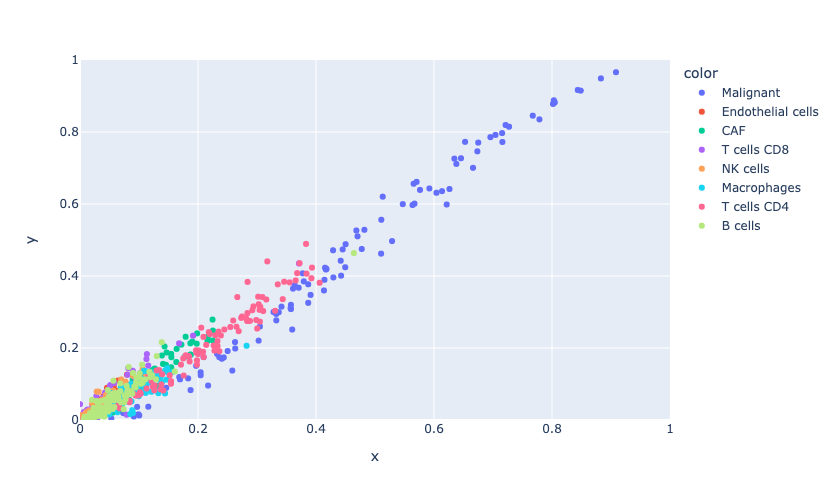

In [13]:
fig = px.scatter(
    x=csx_fractions_derek.stack().values,
    y=csx_fractions.stack().values,
    color=csx_fractions.stack().reset_index()["level_1"],
)
fig.update_layout(
    width=600,
    height=500,
)
fig.update_xaxes(range=(0, 1))
fig.update_yaxes(
    range=(0, 1),
)

In [14]:
pd.concat(
    [csx_fractions.stack(), csx_fractions_derek.stack()],
    names=["docker", "derek"],
    axis=1,
).reset_index().groupby("level_1").corr().iloc[0::2, -1]

level_1             
B cells            0    0.941968
CAF                0    0.971289
Endothelial cells  0    0.972755
Macrophages        0    0.870654
Malignant          0    0.992371
NK cells           0    0.906528
T cells CD4        0    0.969442
T cells CD8        0    0.945046
Name: 1, dtype: float64